In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)

In [4]:
path.ls()

(#3) [Path('/home/vishwa/.fastai/data/mnist_sample/labels.csv'),Path('/home/vishwa/.fastai/data/mnist_sample/valid'),Path('/home/vishwa/.fastai/data/mnist_sample/train')]

In [5]:
Path.BASE_PATH = path

In [6]:
path.ls()

(#3) [Path('labels.csv'),Path('valid'),Path('train')]

In [7]:
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [9]:
sevens

(#6265) [Path('train/7/10002.png'),Path('train/7/1001.png'),Path('train/7/10014.png'),Path('train/7/10019.png'),Path('train/7/10039.png'),Path('train/7/10046.png'),Path('train/7/10050.png'),Path('train/7/10063.png'),Path('train/7/10077.png'),Path('train/7/10086.png')...]

In [10]:
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [11]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors),len(seven_tensors)

(6131, 6265)

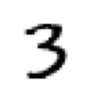

In [13]:
show_image(three_tensors[1]);

In [14]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [15]:
stacked_threes.shape

torch.Size([6131, 28, 28])

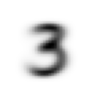

In [16]:
mean3 = stacked_threes.mean(0)
show_image(mean3);

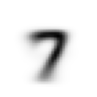

In [17]:
mean7 = stacked_sevens.mean(0)
show_image(mean7);

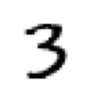

In [18]:
a_3 = stacked_threes[1]
show_image(a_3);

In [19]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3 - mean3)**2).mean().sqrt()
dist_3_abs,dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [20]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In [21]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

In [22]:
# Pytorch arrays cannot be jagged
data = [[1,2,3],[4,5,6,4]]
arr = array (data)
tns = tensor(data)

/tmp/ipykernel_549/2976436624.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = array (data)


ValueError: expected sequence of length 3 at dim 1 (got 4)

In [23]:
valid_3_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o)) 
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [24]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [25]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1488, 0.1145, 0.1158,  ..., 0.1129, 0.1419, 0.1669]),
 torch.Size([1010]))

In [26]:
def is_3(x): return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [27]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [28]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [29]:
accuracy_3s =      is_3(valid_3_tens).float() .mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

In [30]:
def f(x): return x**2

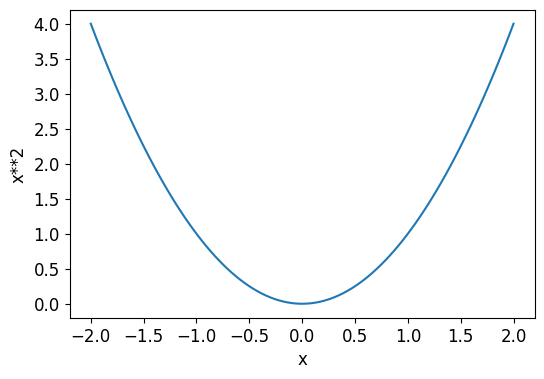

In [31]:
plot_function(f, 'x', 'x**2')

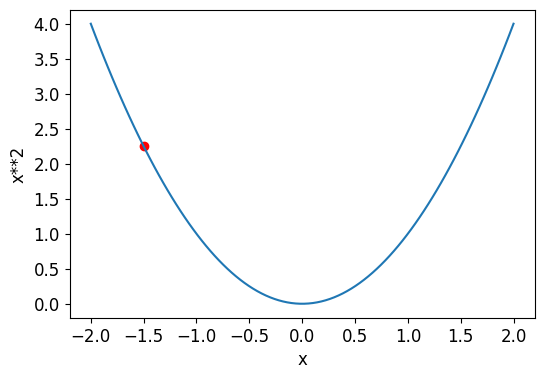

In [32]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red');

In [33]:
xt = tensor(3.).requires_grad_()

In [34]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [35]:
yt.backward()

In [36]:
xt.grad

tensor(6.)

In [37]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [38]:
def f(x): return (x**2).sum()

yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [39]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

# End to End SGD 

In [40]:
time = torch.arange(0,20).float(); 
time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [42]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
speed

tensor([69.6441, 53.9139, 44.1047, 30.3637, 21.1761, 13.4203, 15.6215,  6.1692,  3.7892,  1.7137,  5.3430,  1.3499,  2.0802, 12.3109, 12.9598, 25.2945, 36.2136, 44.8710, 53.8293, 66.3722])

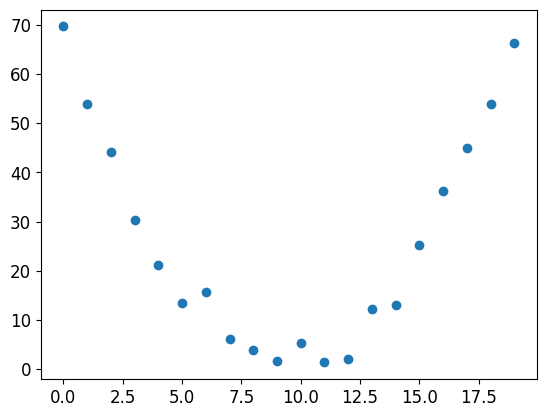

In [43]:
plt.scatter(time,speed);

In [44]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [45]:
def mse(preds, targets): return ((preds-targets)**2).mean()

In [46]:
# a, b, c
params = torch.randn(3).requires_grad_()
params

tensor([ 0.1498, -0.2089, -0.3870], requires_grad=True)

In [47]:
orig_params = params.clone()
orig_params

tensor([ 0.1498, -0.2089, -0.3870], grad_fn=<CloneBackward0>)

In [48]:
preds = f(time, params)
preds

tensor([-0.3870, -0.4461, -0.2057,  0.3343,  1.1739,  2.3130,  3.7517,  5.4899,  7.5277,  9.8651, 12.5020, 15.4385, 18.6745, 22.2101, 26.0453, 30.1800, 34.6143, 39.3481, 44.3815, 49.7145],
       grad_fn=<AddBackward0>)

In [51]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time, speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-100,100)

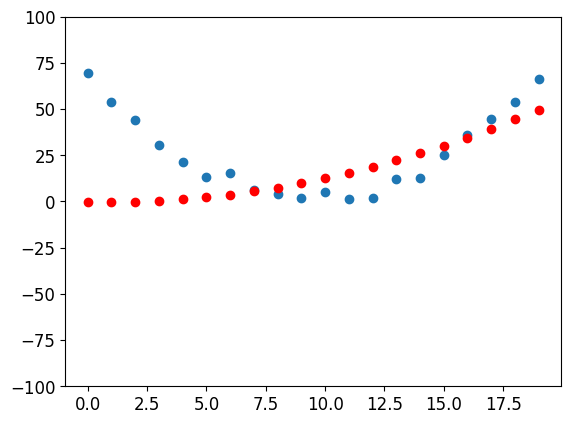

In [52]:
show_preds(preds)

In [53]:
loss = mse(preds, speed)
loss

tensor(634.3897, grad_fn=<MeanBackward0>)

In [54]:
loss.backward()


In [55]:
params.grad

tensor([-159.3539,  -13.6487,  -19.8015])

In [56]:
params.grad * 1e-5

tensor([-0.0016, -0.0001, -0.0002])

In [57]:
params

tensor([ 0.1498, -0.2089, -0.3870], requires_grad=True)

In [58]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [59]:
preds = f(time,params)
mse(preds, speed)

tensor(634.2023, grad_fn=<MeanBackward0>)

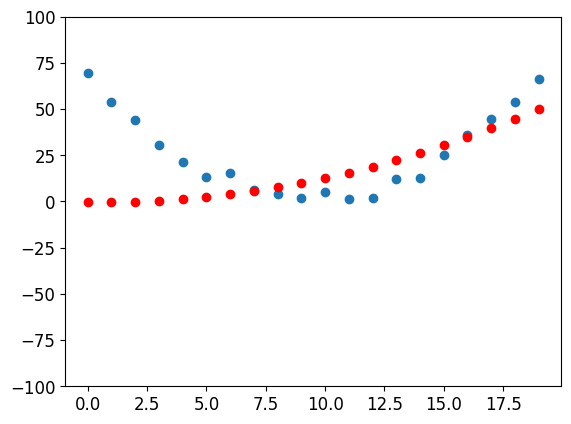

In [60]:
show_preds(preds)

In [61]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [62]:
for i in range(10): apply_step(params)

634.2022705078125
634.1636962890625
634.1534423828125
634.1483764648438
634.1444702148438
634.1405639648438
634.1368408203125
634.1329956054688
634.1292724609375
634.1254272460938


In [63]:
params = orig_params.detach().requires_grad_()

In [64]:
params

tensor([ 0.1498, -0.2089, -0.3870], requires_grad=True)

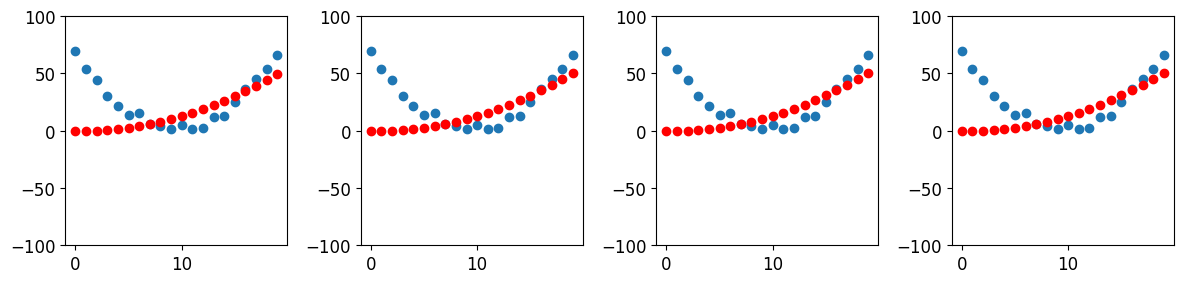

In [65]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

# The MNIST loss function

In [66]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [67]:
train_x.shape

torch.Size([12396, 784])

In [68]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)


In [69]:
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

A `Dataset` in PyTorch is required to return a tuple of `(x,y)` when indexed. Python provides a `zip` function which, when combined with `list`, provides a simple way to get this functionality:

In [70]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [71]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [142]:
valid_y

tensor([[1],
        [1],
        [1],
        ...,
        [0],
        [0],
        [0]])

In [72]:
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [73]:
weights = init_params((28*28,1))

In [74]:
bias = init_params(1)

In [75]:
(train_x[0]*weights.T).sum() + bias

tensor([-14.4462], grad_fn=<AddBackward0>)

In [76]:
def linear1(xb): return xb@weights + bias


In [78]:
preds = linear1(train_x)


In [79]:
preds

tensor([[-14.4462],
        [-11.6078],
        [-14.5558],
        ...,
        [  2.3200],
        [-10.5686],
        [  1.4483]], grad_fn=<AddBackward0>)

In [80]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [False],
        [ True],
        [False]])

In [81]:
corrects.float().mean().item()

0.3976282775402069

In [82]:
with torch.no_grad(): weights[0] *= 1.0001

In [83]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.3976282775402069

In [84]:
trgts  = tensor([1,0,1])
prds   = tensor([0.9, 0.4, 0.2])

In [85]:
def mnist_loss(predictions, targets):
    return torch.where(targets==1, 1-predictions, predictions).mean()

In [89]:
torch.where(trgts==1, 1-prds, prds)

tensor([0.1000, 0.4000, 0.8000])

In [87]:
mnist_loss(prds,trgts)

tensor(0.4333)

In [90]:
def sigmoid(x): return 1/(1+torch.exp(-x))

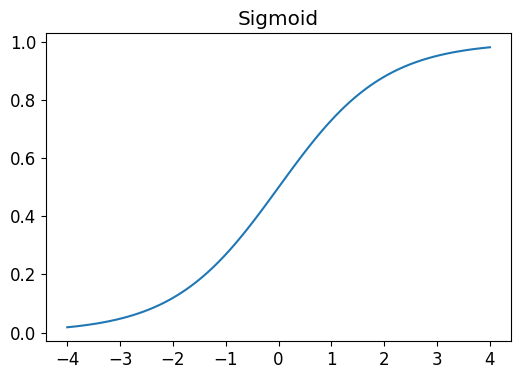

In [91]:
plot_function(torch.sigmoid, title='Sigmoid', min=-4, max=4)

In [92]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

A `DataLoader` can take any Python collection and turn it into an iterator over mini-batches, like so:

In [143]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=False)
list(dl)

[tensor([0, 1, 2, 3, 4]),
 tensor([5, 6, 7, 8, 9]),
 tensor([10, 11, 12, 13, 14])]

In [144]:
for i in dl:
    print(i)

tensor([0, 1, 2, 3, 4])
tensor([5, 6, 7, 8, 9])
tensor([10, 11, 12, 13, 14])


In [145]:
ds = L(enumerate(string.ascii_lowercase))
ds

(#26) [(0, 'a'),(1, 'b'),(2, 'c'),(3, 'd'),(4, 'e'),(5, 'f'),(6, 'g'),(7, 'h'),(8, 'i'),(9, 'j')...]

In [146]:
dl = DataLoader(ds, batch_size=13, shuffle=False)
list(dl)

[(tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
  ('a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm')),
 (tensor([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]),
  ('n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'))]

In [148]:
count =0
for x,y in dl:
    count += 1

count

2

In [98]:
weights = init_params((28*28,1))
bias = init_params(1)

In [99]:
dl = DataLoader(dset, batch_size=256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [100]:
valid_dl = DataLoader(valid_dset, batch_size=256)

In [101]:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [102]:
preds = linear1(batch)
preds

tensor([[13.9141],
        [11.5139],
        [11.0661],
        [10.6022]], grad_fn=<AddBackward0>)

In [103]:
loss = mnist_loss(preds, train_y[:4])
loss

tensor(1.2875e-05, grad_fn=<MeanBackward0>)

In [104]:
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-2.0458e-06), tensor([-1.2874e-05]))

In [105]:
def calc_grad(xb, yb, model):
    preds = model(xb)
    loss = mnist_loss(preds, yb)
    loss.backward()

In [106]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad 

(tensor(-4.0917e-06), tensor([-2.5749e-05]))

In [107]:
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-6.1375e-06), tensor([-3.8623e-05]))

In [108]:
weights.grad.zero_()
bias.grad.zero_();

In [109]:
def train_epoch(model, lr, params):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        for p in params:
            p.data -= p.grad*lr
            p.grad.zero_()

In [110]:
(preds>0.0).float() == train_y[:4]

tensor([[True],
        [True],
        [True],
        [True]])

In [111]:
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [112]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(1.)

In [113]:
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

In [114]:
validate_epoch(linear1)

0.8204

In [115]:
lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.8025

In [116]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.884 0.9207 0.9358 0.9436 0.9475 0.9519 0.9559 0.9583 0.9607 0.9607 0.9632 0.9661 0.9671 0.9671 0.969 0.9705 0.971 0.9725 0.9725 0.9735 

In [117]:
linear_model = nn.Linear(28*28,1)

In [118]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

In [119]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [120]:
opt = BasicOptim(linear_model.parameters(), lr)

In [121]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

In [122]:
validate_epoch(linear_model)

0.3689

In [123]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [124]:
train_model(linear_model, 20)

0.4932 0.813 0.8437 0.9131 0.9341 0.9477 0.955 0.9629 0.9653 0.9672 0.9687 0.9712 0.9731 0.9746 0.9756 0.9761 0.9775 0.9775 0.9785 0.9785 

In [125]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.79 0.854 0.917 0.935 0.9482 0.9575 0.9624 0.9658 0.9677 0.9702 0.9717 0.9736 0.9751 0.9761 0.9765 0.9775 0.978 0.978 0.9785 

fastai also provides `Learner.fit`, which we can use instead of `train_model`. To create a `Learner` we first need to create a `DataLoaders`, by passing in our training and validation `DataLoader`s:

In [126]:
dls = DataLoaders(dl, valid_dl)

In [127]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [130]:
learn.fit(50, lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.013058,0.022182,0.981354,00:00
1,0.012997,0.021986,0.980864,00:00
2,0.012929,0.021802,0.980864,00:00
3,0.012856,0.021631,0.980864,00:00
4,0.012782,0.021470,0.980864,00:00
5,0.012708,0.021319,0.980864,00:00
6,0.012635,0.021176,0.980864,00:00
7,0.012564,0.021041,0.980864,00:00
8,0.012494,0.020914,0.981354,00:00
9,0.012425,0.020793,0.981354,00:00


# Non Linearity

In [131]:
def simple_net(xb): 
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

In [132]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

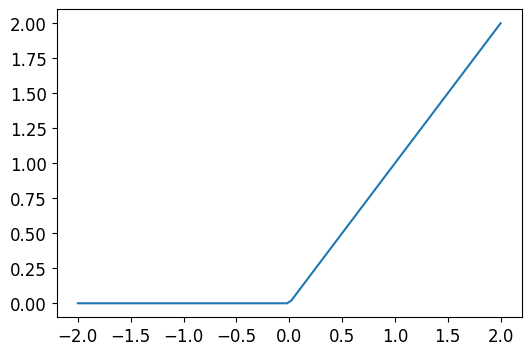

In [133]:
plot_function(F.relu)

In [134]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

In [135]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [136]:
learn.fit(40, 0.1)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.293221,0.411838,0.507851,00:00
1,0.137267,0.228561,0.803238,00:00
2,0.077360,0.117096,0.913150,00:00
3,0.051729,0.079323,0.938175,00:00
4,0.039721,0.061838,0.955348,00:00
5,0.033509,0.051962,0.962218,00:00
6,0.029894,0.045741,0.965162,00:00
7,0.027513,0.041506,0.966634,00:00
8,0.025780,0.038440,0.968106,00:00
9,0.024426,0.036106,0.970559,00:00


In [137]:
L(learn.recorder.values)

(#40) [[0.29322054982185364, 0.4118380844593048, 0.5078508257865906],[0.1372666209936142, 0.22856058180332184, 0.8032384514808655],[0.07735978811979294, 0.11709626019001007, 0.9131501317024231],[0.051728684455156326, 0.07932347804307938, 0.9381746649742126],[0.03972071409225464, 0.06183803081512451, 0.9553483724594116],[0.033509157598018646, 0.05196240544319153, 0.9622178673744202],[0.029893554747104645, 0.0457412414252758, 0.965161919593811],[0.027513258159160614, 0.04150592163205147, 0.9666339755058289],[0.025779925286769867, 0.038439612835645676, 0.9681059718132019],[0.024426255375146866, 0.03610589727759361, 0.9705593585968018]...]

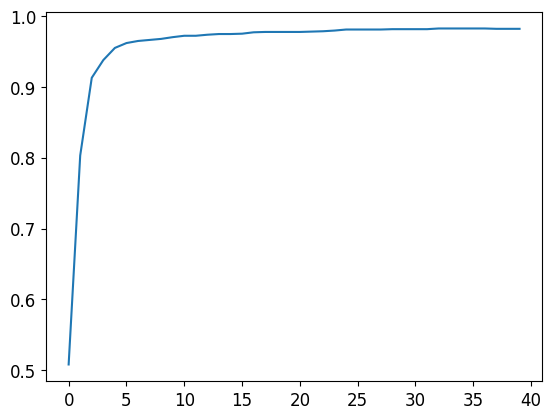

In [140]:
plt.plot(L(learn.recorder.values).itemgot(2));

In [141]:
learn.recorder.values[-1]

(#3) [0.014202495105564594,0.02066674269735813,0.98233562707901]

In [153]:
data =[1,2]
params = tensor(data)

In [154]:
params

tensor([1, 2])

In [155]:
params.data

tensor([1, 2])

In [156]:
params = params +1

In [157]:
params

tensor([2, 3])

In [158]:
params.data += 1

In [159]:
params

tensor([3, 4])

In [160]:
params.data

tensor([3, 4])